# Assignment 9

https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/assignments/MIT18_05S14_ps9.pdf

## Problem 1

a)


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, beta, t, chi2
from math import ceil

In [2]:
heads = 140
tails = 110
total = heads + tails 
x = np.arange(total+1)

In [3]:
def make_probablity_plot(theta):
    # pmf(k, n, p, loc=0)
    binom_pmf = binom.pmf(x, total, theta)
    # mean(n, p, loc=0)
    binom_mean = binom.mean(total, theta)
    # var(n, p, loc=0)
    binom_var = binom.var(total, theta)
    # pdf(x, loc=0, scale=1)
    norm_pmf = norm.pdf(x, loc=binom_mean, scale=binom_var**0.5)
    norm_pmf_rule_of_thumb = norm.pdf(x, loc=binom_mean, scale=(total/4)**0.5)
    
    fig, ax = plt.subplots(1, 1, figsize = (10,6))
    ax.scatter(x, binom_pmf, label="Binomial", c='red')
    ax.plot(x, norm_pmf, label="Normal: adjusted variance")
    ax.plot(x, norm_pmf_rule_of_thumb, label="Normal: rule of thumb")
    ax.set_title(f"Probability for theta={theta}")
    ax.legend()

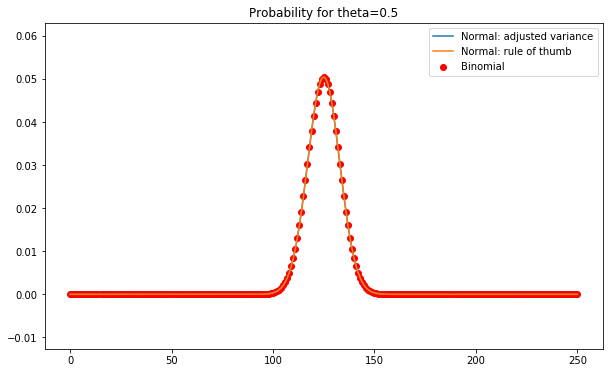

In [4]:
make_probablity_plot(theta=0.5)

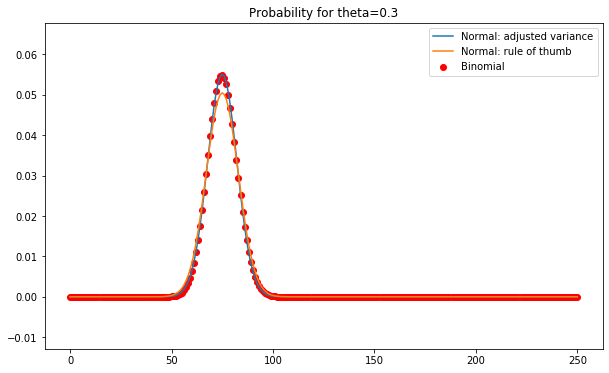

In [5]:
make_probablity_plot(theta=0.3)

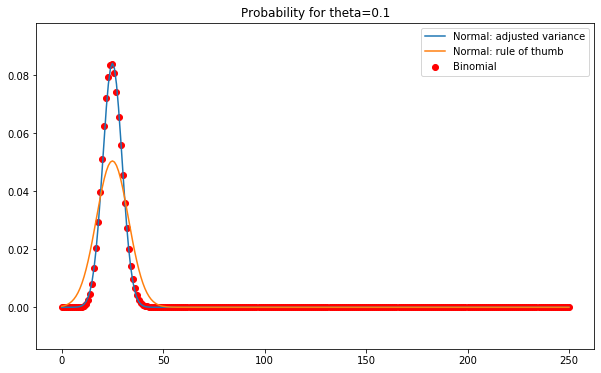

In [6]:
make_probablity_plot(theta=0.1)

b)

In [7]:
x_mean = heads/total
x_mean

0.56

In [8]:
rule_of_thumb_sigma = (1/4)**0.5
rule_of_thumb_sigma

0.5

In [9]:
# for confidence level = 0.8
confidence_threshold = 0.8
alpha = 1 - confidence_threshold
right_critical_value = norm.ppf(1-alpha/2) # Z_alpha/2
range_ = right_critical_value*rule_of_thumb_sigma/total**0.5
range_

0.040526218860755026

In [10]:
lower_limit = x_mean - range_
lower_limit

0.519473781139245

In [11]:
upper_limit = x_mean + range_
upper_limit

0.6005262188607551

In [12]:
# for confidence level = 0.95
confidence_threshold = 0.95
alpha = 1 - confidence_threshold
right_critical_value = norm.ppf(1-alpha/2) # Z_alpha/2
range_ = right_critical_value*rule_of_thumb_sigma/total**0.5
range_

0.06197950323045616

In [13]:
lower_limit = x_mean - range_
lower_limit

0.4980204967695439

In [14]:
upper_limit = x_mean + range_
upper_limit

0.6219795032304563

c)

In [15]:
a = 1 + heads
b = 1 + tails

In [16]:
# pdf(x, a, b, loc=0, scale=1)
x = np.linspace(0,1,101)
y = beta.pdf(x, a, b)

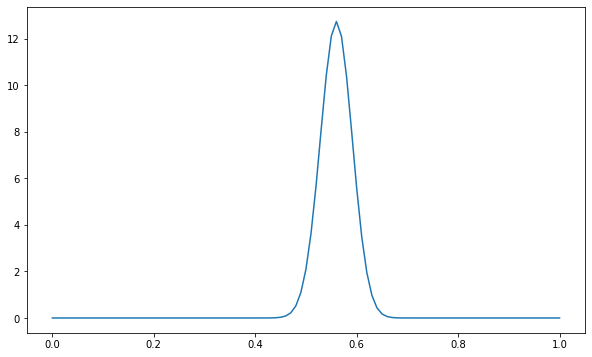

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.plot(x,y)

In [18]:
# ppf(q, a, b, loc=0, scale=1)
lower_limit = beta.ppf(0.1, a, b)

In [19]:
# ppf(q, a, b, loc=0, scale=1)
upper_limit = beta.ppf(0.9, a, b)
upper_limit

0.5994730908985111

## Problem 2

a)

In [20]:
x_mean = 69.55
sample_variance = 14.26
sample_std = sample_variance**0.5
n = 20
df = n - 1

In [21]:
confidence = 0.9
alpha = 1 - confidence

In [22]:
# ppf(q, df, loc=0, scale=1)
right_critical_value = t.ppf(1-alpha/2, df) # Z_alpha/2
right_critical_value

1.729132811521367

In [23]:
range_ = right_critical_value*sample_std/n**0.5
range_

1.460068114696807

In [24]:
lower_limit = x_mean - range_
lower_limit

68.08993188530319

In [25]:
upper_limit = x_mean + range_
upper_limit

71.01006811469681

b)

In [26]:
population_std = 3.77
confidence = 0.9
alpha = 1 - confidence

In [27]:
# ppf(q, loc=0, scale=1)
right_critical_value = norm.ppf(1-alpha/2) # Z_alpha/2
right_critical_value

1.6448536269514722

In [28]:
range_ = right_critical_value*population_std/n**0.5
range_

1.3866077051335157

In [29]:
lower_limit = x_mean - range_
lower_limit

68.16339229486648

In [30]:
upper_limit = x_mean + range_
upper_limit

70.93660770513351

c)

In [31]:
range_narrow = 1/2

In [32]:
n_narrow = ceil((right_critical_value*population_std/range_narrow)**2)
n_narrow

154

In [33]:
#check again
range_ = right_critical_value*population_std/n_narrow**0.5
range_

0.49969873104684054

d)

In [34]:
range_narrow = 1/2
sample_variance = 14.26
sample_std = sample_variance**0.5

In [35]:
n_narrow = 157
df = n_narrow - 1
confidence = 0.9
alpha = 1 - confidence
# ppf(q, df, loc=0, scale=1)
right_critical_value = t.ppf(1-alpha/2, df) # Z_alpha/2
range_ = right_critical_value*sample_std/n_narrow**0.5
range_

0.4986822991029846

## Problem 3

In [62]:
population_std = 3
data = np.array([352, 351, 361, 353, 352, 358, 360, 358, 359])
x_mean = data.mean()
sample_variance = 1/(n-1)*((data - data.mean())**2).sum()
sample_std = sample_variance**0.5
n = len(data)
df = n-1

a)

In [73]:
confidence = 0.95
alpha = 1 - confidence
# ppf(q, loc=0, scale=1)
right_critical_value = norm.ppf(1-alpha/2) # Z_alpha/2
range_ = right_critical_value*population_std/n**0.5
lower_limit = x_mean - range_
upper_limit = x_mean + range_
print(f"{confidence*100}-confidence interval: [{lower_limit:.3f}:{upper_limit:.3f}]")

95.0-confidence interval: [354.040:357.960]


b)

In [74]:
confidence = 0.98
alpha = 1 - confidence
# ppf(q, loc=0, scale=1)
right_critical_value = norm.ppf(1-alpha/2) # Z_alpha/2
range_ = right_critical_value*population_std/n**0.5
lower_limit = x_mean - range_
upper_limit = x_mean + range_
print(f"{confidence*100}-confidence interval: [{lower_limit:.3f}:{upper_limit:.3f}]")

98.0-confidence interval: [353.674:358.326]


c)

In [77]:
confidence = 0.95
alpha = 1 - confidence
# ppf(q, loc=0, scale=1)
right_critical_value = t.ppf(1-alpha/2, df) # Z_alpha/2
range_ = right_critical_value*sample_std/n**0.5
lower_limit = x_mean - range_
upper_limit = x_mean + range_
print(f"{confidence*100}-confidence interval: [{lower_limit:.3f}:{upper_limit:.3f}]")

95.0-confidence interval: [352.974:359.026]


In [78]:
confidence = 0.98
alpha = 1 - confidence
# ppf(q, loc=0, scale=1)
right_critical_value = t.ppf(1-alpha/2, df) # Z_alpha/2
range_ = right_critical_value*sample_std/n**0.5
lower_limit = x_mean - range_
upper_limit = x_mean + range_
print(f"{confidence*100}-confidence interval: [{lower_limit:.3f}:{upper_limit:.3f}]")

98.0-confidence interval: [352.199:359.801]


## Problem 4

In [96]:
data = np.array([6.0, 6.4, 7.0, 5.8, 6.0, 5.8, 5.9, 6.7, 6.1, 6.5, 6.3, 5.8])
n = len(data)
df = n-1

In [97]:
sample_variance = 1/(n-1)*((data - data.mean())**2).sum()
print("sample_variance", sample_variance)

sample_variance 0.15356060606060612


In [100]:
confidence = 0.95
alpha = 1 - confidence
# ppf(q, df, loc=0, scale=1)
right_critical_value = chi2.ppf(1-alpha/2, df)
print("right_critical_value", right_critical_value)
left_critical_value = chi2.ppf(alpha/2, df)
print("left_critical_value", left_critical_value)

right_critical_value 21.9200492610212
left_critical_value 3.8157482522361


In [101]:
lower_limit = (n-1)*sample_variance/right_critical_value
print("lower_limit", lower_limit)
upper_limit = (n-1)*sample_variance/left_critical_value
print("upper_limit", upper_limit)

lower_limit 0.07706034993590946
upper_limit 0.44268294316240175


b)
1. It is normal distribution
2. Men and women have comes from the same distribution

## Problem 5

In [102]:
n = 10
sample_variance = 4.2
df = n-1

In [103]:
confidence = 0.95
alpha = 1 - confidence
# ppf(q, df, loc=0, scale=1)
right_critical_value = chi2.ppf(1-alpha/2, df)
print("right_critical_value", right_critical_value)
left_critical_value = chi2.ppf(alpha/2, df)
print("left_critical_value", left_critical_value)

right_critical_value 19.02276779864163
left_critical_value 2.7003894999803584


In [105]:
lower_limit = (n-1)*sample_variance/right_critical_value
print("lower_limit", lower_limit**0.5)
upper_limit = (n-1)*sample_variance/left_critical_value
print("upper_limit", upper_limit**0.5)

lower_limit 1.4096426997301283
upper_limit 3.741387531622518
